In [1]:
#匯入類神經網路套件
import tensorflow as tf

#匯入資料視覺化套件
import matplotlib.pyplot as plt

In [2]:
#載入數字手寫辨識的範例資料集
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#將資料正規化
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


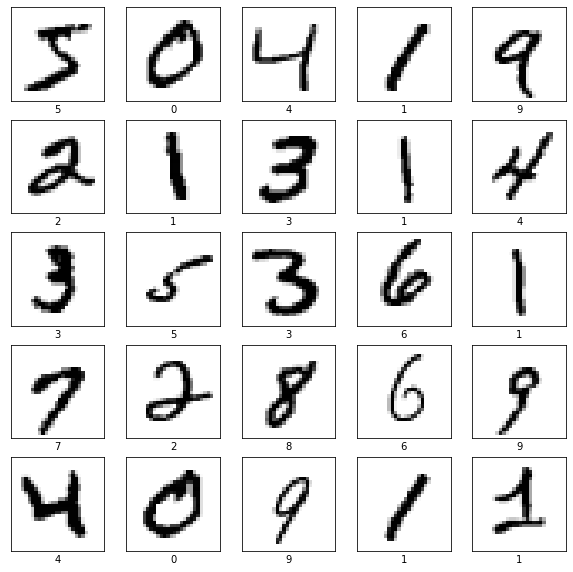

In [3]:
#繪製訓練資料集前25個數字
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
#部署類神經網路
#先把28x28的二維陣列轉成一維陣列(Flatten)
#第二層神經元部署128個，並設定激活函數為relu
#第三層，也就是輸出層，因為0~9數字有10類，所以設定10個節點
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [5]:
#挑選loss function
#面對不同問題使用的loss function會不同，上面的部署狀況也可能不同
#但對於國高中生，或是初學者，就先理解loss是計算誤差的
#訓練的過程，類神經網路一邊依照loss調整權重，一邊降低loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
#optimizer、metrics的概念我還不太會描述
#但他們也都是控制著「訓練過程」中的小細節
#像是optimizer可能就決定了類神經網路參照完loss後，要對權重做多大幅度的調整
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [7]:
#開始train model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2572 - accuracy: 0.9272
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1147 - accuracy: 0.9660
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0796 - accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0601 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0461 - accuracy: 0.9859


In [8]:
#評估model
model.evaluate(x_test,  y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9778


[0.06996780633926392, 0.9778000116348267]

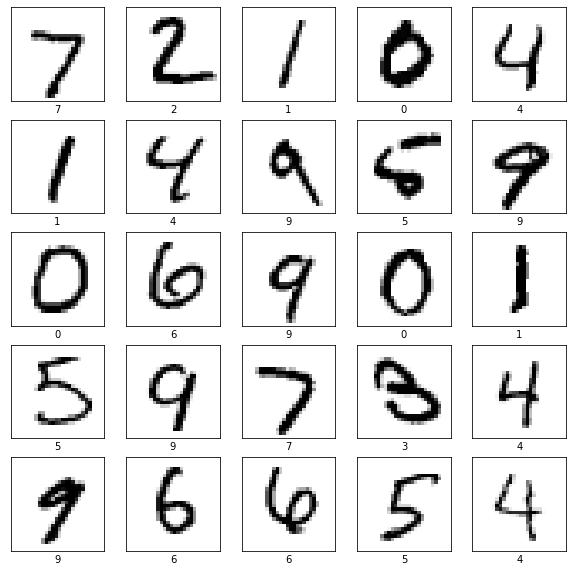

In [9]:
#繪製測試資料集前25個數字
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

In [10]:
#觀察測試資料集前5個數字透過model所預測的結果
model(x_test[:5]).numpy()

array([[ -4.5826983 ,  -9.296119  ,  -1.9408916 ,   3.0358193 ,
         -9.10693   ,  -4.78031   , -16.783602  ,  10.609177  ,
         -3.292171  ,   0.6939731 ],
       [ -6.976032  ,   1.9028759 ,  11.016987  ,   0.2543011 ,
        -20.519442  ,  -4.3945217 ,  -7.7986493 , -13.770756  ,
         -2.5305974 , -12.76048   ],
       [ -8.542677  ,   6.07651   ,  -2.8286917 ,  -3.669752  ,
         -1.2641611 ,  -4.4598045 ,  -4.93693   ,   0.21259354,
         -2.5640063 ,  -6.8327317 ],
       [  9.396     ,  -7.56419   ,  -4.548278  ,  -9.6489315 ,
         -5.8678484 ,  -5.763966  ,   0.8728834 ,  -5.1129823 ,
         -9.252782  ,  -0.45700717],
       [ -3.6325765 ,  -9.41095   ,  -2.7788272 ,  -7.4203105 ,
          9.720546  ,  -7.8064914 ,  -2.2371974 ,  -1.6579096 ,
         -4.9209723 ,   4.820641  ]], dtype=float32)